# 1 - Corruption Deterrence Empirical Model


Following Berlin, Qin and Spagnolo (2018) , a possible OLS regression (Poisson Regression) using feasible data from the State of Santa Catarina Public Prosecution(MPSC) from filings for corruption as dependent variable $Y$ can be expressed by:

$$Y_{t}=\beta_{0}+\beta_1 D_t+ \beta _2 T1^{n}_{t}+ \beta _3 T2^{n}_{t} + \beta_4 X_{t} + \varepsilon_{t}$$

For,

$t$= Month after January 2005; and 

$n$= Order of the intended tested polynomial.


Where

$Y_{t}$= Number of filings for corruption crimes (Or corruption Related Crimes);

$D_t$= Dummy for the impact of the enforcements, being 0 before August 2013 and 1 after;

$T1$= Time effect of all sample. Being 1 at the first observation 2 at the next and so on;

$T2$= Time effect from the beginning of the enforcement shock. Being 1 after august 2013, 2 in the next month and so on;

$X_{t}$= Vector of instrumental variables that may affect corruption filings in each point in time ; and

$\varepsilon_{it}$= Is the error from functional predictions, it is expected to be normally distributed and i.i.d.


In order to test different shaped polynomials that might fit the expected detection curve,  the variables $T1$ and $T2$ can be tested on different order polynomials to check different goodness of fit.

In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np
import math
import matplotlib.pyplot as plt 

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML


In [2]:
df = pd.read_csv('C:/Users/lucas/OneDrive/Desktop/Thesis/Empirics/MPSC.csv')
print = type(df)

In [3]:
#Debuging excel data format to python for the colums "dt_instauracao"#

s = df['date']
s_int = s.astype(int)

# Correcting Excel Leap Year bug.
days = pd.to_timedelta(np.where(s_int > 59, s_int - 1, s_int), unit='D')
secs = pd.to_timedelta(
    ((s - s_int) * 86400.0).round().astype(int), unit='s')
pd.to_datetime('1899/12/31') + days + secs
df['date']= pd.to_datetime('1899/12/31') + days + secs

# #UNCOMENT TO DROP THE OUTLIERS
# #droping monthly outliers ##greater than 8
for n, i in enumerate(df['Corrupcao_passiva']):
    if i > 7:
        df['Corrupcao_passiva'][n] = 7

# #droping monthly outliers for Peculato ##greater than 20
for n, i in enumerate(df['Peculato']):
    if i > 20:
        df['Peculato'][n] = 20


# creating variable of the extended notion of corruption

ext_corruption =[df['Peculato'],df['Concussao'],df['Corrupcao_passiva']]
ext_corruption = DataFrame(ext_corruption)
ext_corruption = ext_corruption.sum(axis=0)
df['ext_corruption'] = ext_corruption

# Creating Corruption as a ratio from crimes of contempt
df['corruption'] = df['Corrupcao_passiva']/df['Desacato']

# Creating Corruption as a ratio from corrutpion related crimes and contempt
df['corruption2'] = df['ext_corruption']/df['Desacato']



#df.drop(['Crimes contra a Administração Pública'], axis=1)


# ploting the data#
#seting the format month-year as the main one#

df = df.set_index('date')
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Crimes contra a Administração Pública,Peculato,Emprego irregular de verbas ou rendas públicas,Concussao,Corrupcao_passiva,Corrupcao_ativa,Prevaricacao,Desacato,Outros,ext_corruption,corruption,corruption2
date,,,,,,,,,,,,
2005-01-01,NaN,2.0,NaN,NaN,2.0,NaN,1.0,28,17,4.0,0.071429,0.142857
2005-02-01,NaN,2.0,NaN,3.0,2.0,NaN,1.0,17,32,7.0,0.117647,0.411765
2005-03-01,NaN,3.0,NaN,6.0,2.0,NaN,NaN,47,29,11.0,0.042553,0.234043
2005-04-01,NaN,11.0,NaN,1.0,2.0,NaN,NaN,41,36,14.0,0.048780,0.341463
2005-05-01,NaN,1.0,NaN,4.0,2.0,NaN,NaN,59,45,7.0,0.033898,0.118644
2005-06-01,NaN,3.0,NaN,1.0,1.0,NaN,NaN,53,35,5.0,0.018868,0.094340
2005-07-01,NaN,3.0,NaN,2.0,3.0,NaN,1.0,48,37,8.0,0.062500,0.166667
2005-08-01,NaN,3.0,2.0,NaN,3.0,NaN,1.0,39,46,6.0,0.076923,0.153846
2005-09-01,NaN,1.0,NaN,4.0,1.0,NaN,NaN,37,53,6.0,0.027027,0.162162


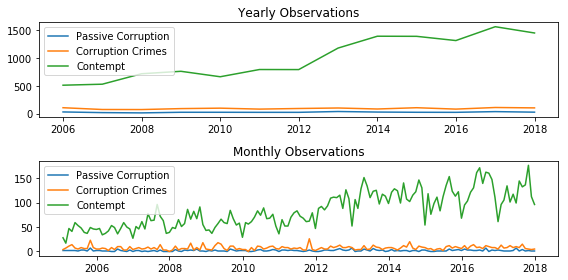

In [4]:
# ploting the data#

fig = plt.figure(figsize=(8,4))

plt.subplot(2,1,1)
plt.plot(df.resample('Y').Corrupcao_passiva.sum())
plt.plot(df.resample('Y').ext_corruption.sum())
plt.plot(df.resample('Y').Desacato.sum())
plt.legend(['Passive Corruption', 'Corruption Crimes', 'Contempt'],loc=2)
plt.title('Yearly Observations')
plt.subplot(2,1,2)

plt.plot(df.resample('M').Corrupcao_passiva.sum())
plt.plot(df.resample('M').ext_corruption.sum())
plt.plot(df.resample('M').Desacato.sum())
plt.legend(['Passive Corruption', 'Corruption Crimes', 'Contempt'],loc=2)
plt.title('Monthly Observations')

plt.tight_layout()
plt.show()

fig.savefig('emp1.pdf')

# Running Yearly Regressions

Here I run all the regressions for the dependent variables Passive Corruption, all corruption crimes and corruption ratio.


In [5]:
#Yearly Variables
#Creating the yearly dataframe 
ydf = df.resample('Y').sum()

ydf['year'] = range(2005,2018)

ydf['ycons'] = 1 


# creat a dummy with 0 before 2013 and 1 after #
ydummy = []   
for i in (range(2005,2018)):
    if i < 2014:
        ydummy.append(0)
    else:
        ydummy.append(1)
        
ydf['ydummy'] = ydummy

# creat a list of 1 to 13#
yt1 = list(range(1,14)) 

ydf['yt1'] = yt1


# creat a polynom root after 2013#
yt2= []                  # creat a polynom root after 2013#
for i in (range(2005,2018)):
    if i < 2014:
        yt2.append(0)
    else:
        yt2.append(i-2014)
ydf['yt2'] = yt2
        
# Creating the higher order polynoms       
        
ydf['yt1'] = yt1         
ydf['ys1'] = np.power(yt1,2)
ydf['yc1'] = np.power(yt1,3)
ydf['ys2'] = np.power(yt2,2)
ydf['yc2'] = np.power(yt2,3)



ydf

,Crimes contra a Administração Pública,Peculato,Emprego irregular de verbas ou rendas públicas,Concussao,Corrupcao_passiva,Corrupcao_ativa,Prevaricacao,Desacato,Outros,ext_corruption,...,corruption2,year,ycons,ydummy,yt1,yt2,ys1,yc1,ys2,yc2
date,,,,,,,,,,,,,,,,,,,,,
2005-12-31,0.0,42.0,2.0,34.0,28.0,0.0,9.0,509,435,104.0,...,2.580198,2005,1,0,1,0,1,1,0,0
2006-12-31,0.0,29.0,6.0,27.0,16.0,0.0,12.0,527,477,72.0,...,1.721553,2006,1,0,2,0,4,8,0,0
2007-12-31,0.0,38.0,1.0,22.0,11.0,0.0,7.0,715,542,71.0,...,1.190022,2007,1,0,3,0,9,27,0,0
2008-12-31,0.0,53.0,3.0,13.0,22.0,0.0,12.0,759,572,88.0,...,1.512554,2008,1,0,4,0,16,64,0,0
2009-12-31,0.0,51.0,1.0,23.0,22.0,0.0,10.0,661,555,96.0,...,1.707318,2009,1,0,5,0,25,125,0,0
2010-12-31,0.0,40.0,0.0,18.0,21.0,17.0,7.0,791,628,79.0,...,1.201907,2010,1,0,6,0,36,216,0,0
2011-12-31,0.0,51.0,0.0,18.0,21.0,35.0,9.0,790,580,90.0,...,1.410814,2011,1,0,7,0,49,343,0,0
2012-12-31,0.0,46.0,3.0,17.0,36.0,68.0,12.0,1177,823,99.0,...,1.034144,2012,1,0,8,0,64,512,0,0
2013-12-31,0.0,46.0,1.0,9.0,26.0,40.0,13.0,1390,904,81.0,...,0.697715,2013,1,0,9,0,81,729,0,0


In [6]:
# PASSIVE CORRUPTION ONLY
results1 = sm.OLS(ydf['Corrupcao_passiva'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['Corrupcao_passiva'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['Corrupcao_passiva'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['Corrupcao_passiva'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "up". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


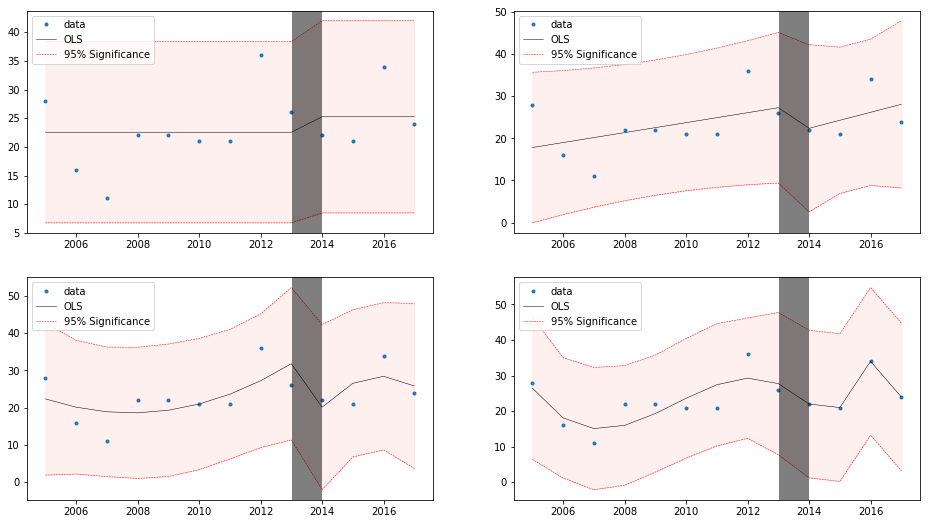

In [7]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l, iv_u = wls_prediction_std(results1)
plt.plot(ydf['year'], ydf['Corrupcao_passiva'], '.',lw=1)
plt.plot(ydf['year'], results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u,iv_l, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(ydf['year'], ydf['Corrupcao_passiva'], '.',lw=1)
plt.plot(ydf['year'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u2, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l2, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(ydf['year'], ydf['Corrupcao_passiva'], '.',lw=1)
plt.plot(ydf['year'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u3, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l3, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='up');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(ydf['year'], ydf['Corrupcao_passiva'], '.',lw=1)
plt.plot(ydf['year'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u4, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l4, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp2.pdf')

In [8]:
# Corruption as (Embezzlement + Ilicit Enrichment + Corruption)
results1 = sm.OLS(ydf['ext_corruption'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['ext_corruption'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['ext_corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['ext_corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())

In [9]:
# Corruption as ratio from contempt
results1 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['corruption'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "up". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


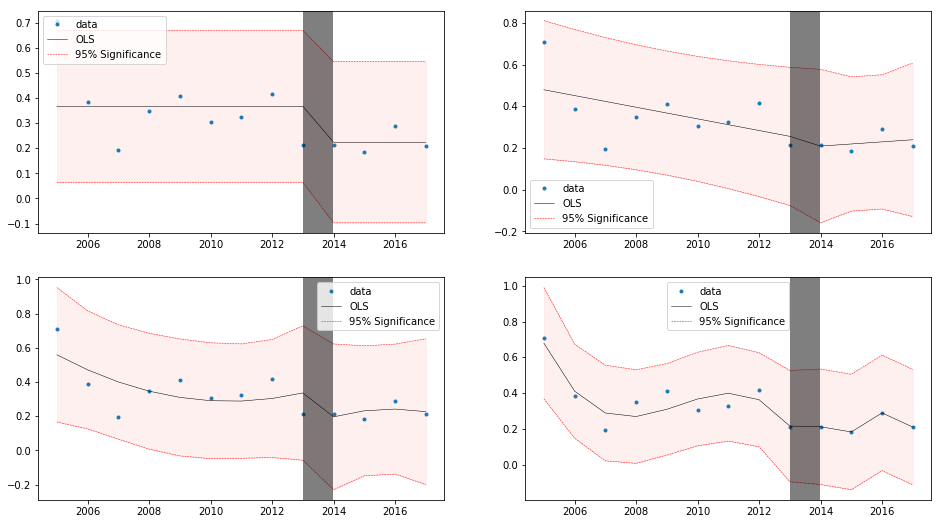

In [10]:

plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l, iv_u = wls_prediction_std(results1)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u,iv_l, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u2, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l2, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u3, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l3, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='up');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(ydf['year'], ydf['corruption'], '.',lw=1)
plt.plot(ydf['year'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u4, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l4, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

In [11]:
# Ration from Corruption Crimes (Embezzlement + Ilicit Enrichment + Corruption)
results1 = sm.OLS(ydf['corruption2'], ydf[['ycons','ydummy']]).fit()
results2 = sm.OLS(ydf['corruption2'], ydf[['ycons','ydummy','yt1','yt2']]).fit()
results3 = sm.OLS(ydf['corruption2'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2']]).fit()
results4 = sm.OLS(ydf['corruption2'], ydf[['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['ycons','ydummy','yt1','yt2','ys1','ys2','yc1','yc2'])
HTML(stargazer.render_html())



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "up". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


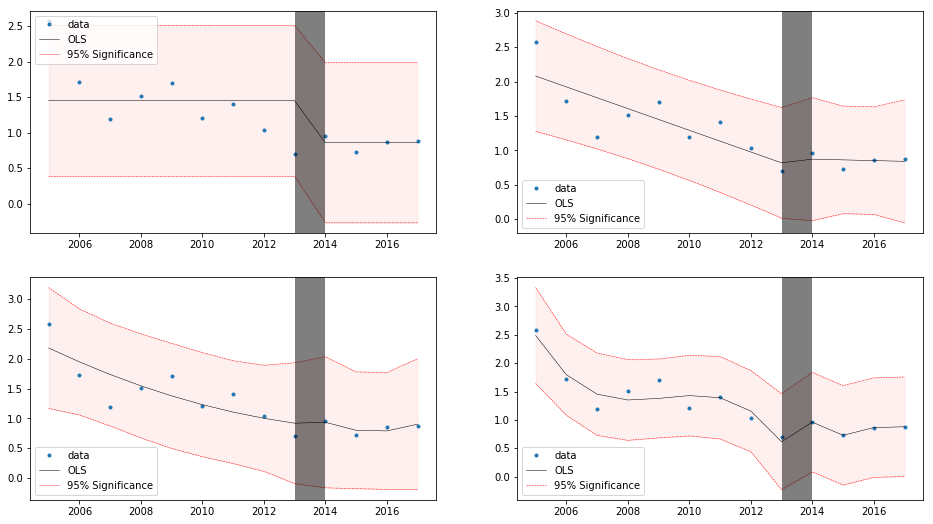

In [12]:
fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l, iv_u = wls_prediction_std(results1)
plt.plot(ydf['year'], ydf['corruption2'], '.',lw=1)
plt.plot(ydf['year'], results1.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u,iv_l, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(ydf['year'], ydf['corruption2'], '.',lw=1)
plt.plot(ydf['year'], results2.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u2, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l2, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(ydf['year'], ydf['corruption2'], '.',lw=1)
plt.plot(ydf['year'], results3.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u3, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l3, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='up');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(ydf['year'], ydf['corruption2'], '.',lw=1)
plt.plot(ydf['year'], results4.fittedvalues, 'k-', lw=0.5)
plt.plot(ydf['year'], iv_u4, 'r----', lw=0.5)
plt.plot(ydf['year'], iv_l4, 'r----', lw=0.5)
theta = 2013.5
plt.axvline(theta, color='black', lw=30, alpha=0.5)
plt.fill_between(ydf['year'], iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()
fig.savefig('emp4.pdf')

## Monthly Observations

In [13]:
#Monthly

mdf = df.resample('M').sum()

mdf['mdate'] = pd.date_range(start='1/1/2005', end='1/1/2018', freq='M')  

mdf['mcons'] = 1

# creat a dummy with 0 before 2013 and 1 after #
mdummy = []    
for i in (range(1,157)):
    if i < 80:
        mdummy.append(0)
    else:
        mdummy.append(1)
        
mdf['mdummy'] = mdummy

# creat a list of 1 to 13#
mt1 = list(range(1,157))  

mdf['mt1'] = mt1

# creat a polynom root after 2013#
mt2= []                  
for i in (range(1,157)):
    if i < 80:
        mt2.append(0)
    else:
        mt2.append(i+157)
        
mdf['mt2'] = mt2

#Creating other orther polynomials
        
mdf['ms1'] = np.power(mt1,2)
mdf['mc1'] = np.power(mt1,3)
mdf['ms2'] = np.power(mt2,2)
mdf['mc2'] = np.power(mt2,3)

mdf

,Crimes contra a Administração Pública,Peculato,Emprego irregular de verbas ou rendas públicas,Concussao,Corrupcao_passiva,Corrupcao_ativa,Prevaricacao,Desacato,Outros,ext_corruption,...,corruption2,mdate,mcons,mdummy,mt1,mt2,ms1,mc1,ms2,mc2
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.0,2.0,0.0,0.0,2.0,0.0,1.0,28,17,4.0,...,0.142857,2005-01-31,1,0,1,0,1,1,0,0
2005-02-28,0.0,2.0,0.0,3.0,2.0,0.0,1.0,17,32,7.0,...,0.411765,2005-02-28,1,0,2,0,4,8,0,0
2005-03-31,0.0,3.0,0.0,6.0,2.0,0.0,0.0,47,29,11.0,...,0.234043,2005-03-31,1,0,3,0,9,27,0,0
2005-04-30,0.0,11.0,0.0,1.0,2.0,0.0,0.0,41,36,14.0,...,0.341463,2005-04-30,1,0,4,0,16,64,0,0
2005-05-31,0.0,1.0,0.0,4.0,2.0,0.0,0.0,59,45,7.0,...,0.118644,2005-05-31,1,0,5,0,25,125,0,0
2005-06-30,0.0,3.0,0.0,1.0,1.0,0.0,0.0,53,35,5.0,...,0.094340,2005-06-30,1,0,6,0,36,216,0,0
2005-07-31,0.0,3.0,0.0,2.0,3.0,0.0,1.0,48,37,8.0,...,0.166667,2005-07-31,1,0,7,0,49,343,0,0
2005-08-31,0.0,3.0,2.0,0.0,3.0,0.0,1.0,39,46,6.0,...,0.153846,2005-08-31,1,0,8,0,64,512,0,0
2005-09-30,0.0,1.0,0.0,4.0,1.0,0.0,0.0,37,53,6.0,...,0.162162,2005-09-30,1,0,9,0,81,729,0,0


In [14]:
#  Corruption 
results1 = sm.OLS(mdf['Corrupcao_passiva'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['Corrupcao_passiva'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.OLS(mdf['Corrupcao_passiva'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.OLS(mdf['Corrupcao_passiva'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2'])
HTML(stargazer.render_html())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "up". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


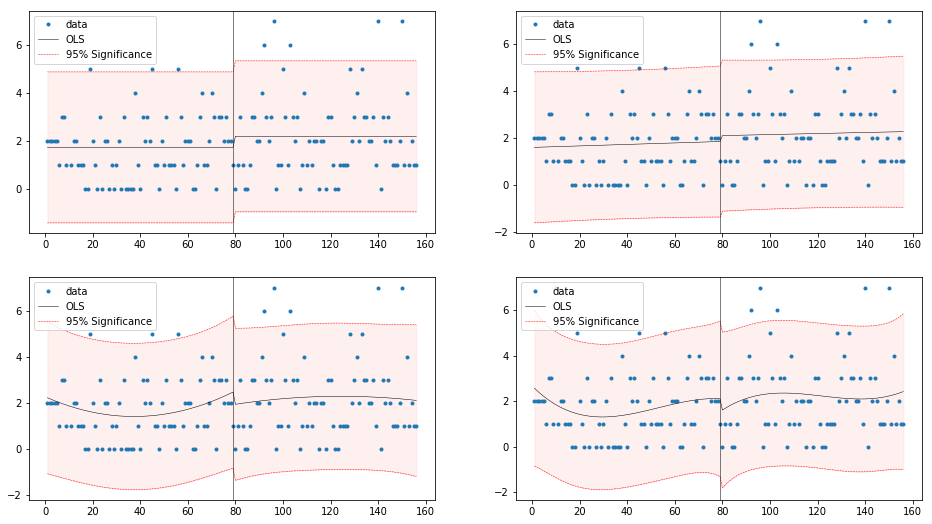

In [15]:

fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(range(1,157), mdf['Corrupcao_passiva'], '.',lw=1)
plt.plot(range(1,157), results1.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u1, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l1, 'r----', lw=0.5)
theta = 79
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(range(1,157), mdf['Corrupcao_passiva'], '.',lw=1)
plt.plot(range(1,157), results2.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u2, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157),iv_u2,iv_l2, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(range(1,157), mdf['Corrupcao_passiva'], '.',lw=1)
plt.plot(range(1,157), results3.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u3, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157), iv_u3,iv_l3, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='up');

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(range(1,157), mdf['Corrupcao_passiva'], '.',lw=1)
plt.plot(range(1,157), results4.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u4, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u4,iv_l4, color='red', alpha='0.06')

plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp3.pdf')

In [16]:
#  Corruption 
results1 = sm.OLS(mdf['corruption'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.OLS(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.OLS(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2'])
HTML(stargazer.render_html())

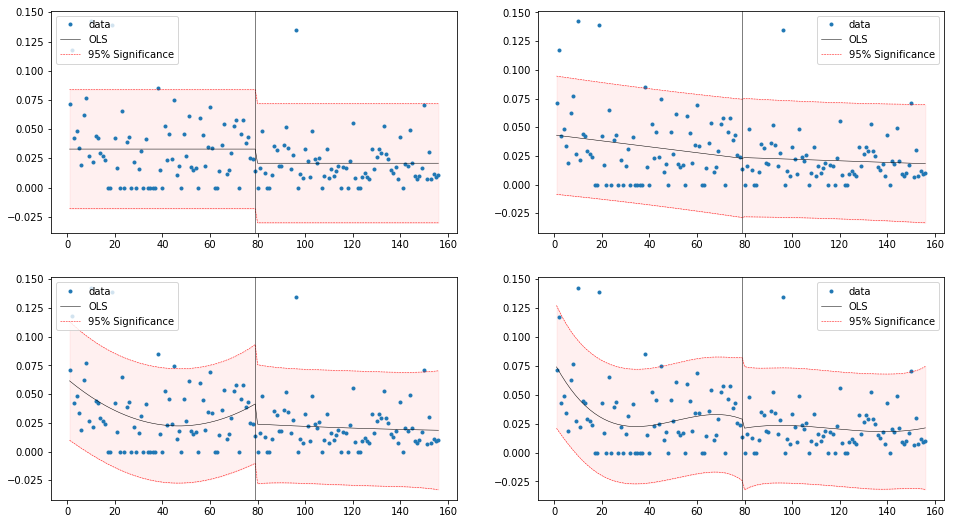

In [17]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(range(1,157), mdf['corruption'], '.',lw=1)
plt.plot(range(1,157), results1.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u1, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l1, 'r----', lw=0.5)
theta = 79
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='upper left');


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(range(1,157), mdf['corruption'], '.',lw=1)
plt.plot(range(1,157), results2.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u2, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157),iv_u2,iv_l2, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(range(1,157), mdf['corruption'], '.',lw=1)
plt.plot(range(1,157), results3.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u3, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157), iv_u3,iv_l3, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(range(1,157), mdf['corruption'], '.',lw=1)
plt.plot(range(1,157), results4.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u4, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u4,iv_l4, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

In [18]:
#  Corruption all `types'  correted using contempt

results1 = sm.OLS(mdf['corruption2'], mdf[['mcons','mdummy']]).fit()
results2 = sm.OLS(mdf['corruption2'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
results3 = sm.OLS(mdf['corruption2'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
results4 = sm.OLS(mdf['corruption2'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2'])
HTML(stargazer.render_html())

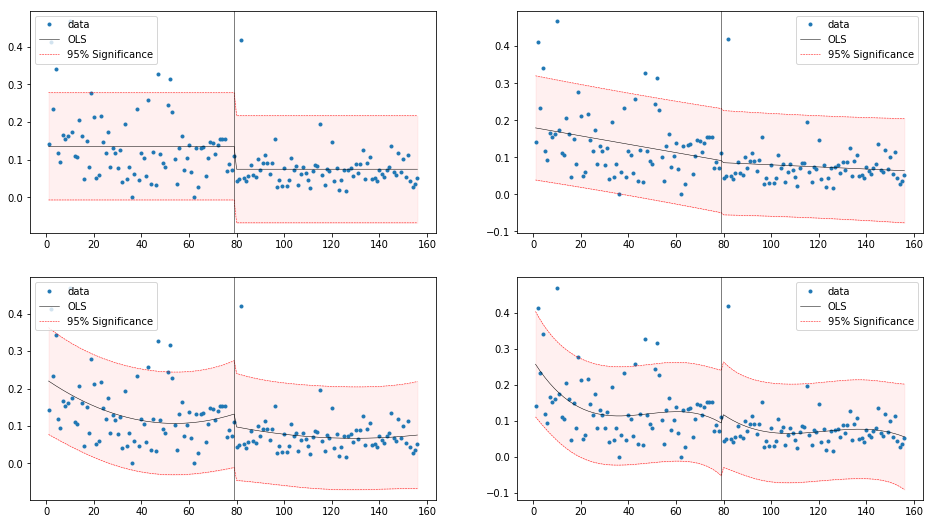

In [19]:
fig = plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
prstd1, iv_l1, iv_u1 = wls_prediction_std(results1)
plt.plot(range(1,157), mdf['corruption2'], '.',lw=1)
plt.plot(range(1,157), results1.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u1, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l1, 'r----', lw=0.5)
theta = 79
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u1,iv_l1, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='upper left');


plt.subplot(2,2,2)
prstd1, iv_l2, iv_u2 = wls_prediction_std(results2)
plt.plot(range(1,157), mdf['corruption2'], '.',lw=1)
plt.plot(range(1,157), results2.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u2, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l2, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157),iv_u2,iv_l2, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='best');



plt.subplot(2,2,3)
prstd1, iv_l3, iv_u3 = wls_prediction_std(results3)
plt.plot(range(1,157), mdf['corruption2'], '.',lw=1)
plt.plot(range(1,157), results3.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u3, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l3, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between( range(1,157), iv_u3,iv_l3, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc=2);

plt.subplot(2,2,4)
prstd1, iv_l4, iv_u4 = wls_prediction_std(results4)
plt.plot(range(1,157), mdf['corruption2'], '.',lw=1)
plt.plot(range(1,157), results4.fittedvalues, 'k-', lw=0.5)
plt.plot(range(1,157), iv_u4, 'r----', lw=0.5)
plt.plot(range(1,157), iv_l4, 'r----', lw=0.5)
plt.axvline(theta, color='black', lw=1, alpha=0.5)
plt.fill_between(range(1,157), iv_u4,iv_l4, color='red', alpha='0.06')
plt.legend(('data','OLS','95% Significance'),loc='best');

plt.show()

fig.savefig('emp5.pdf')

In [20]:
#  Corruption  Using Poisson Regressions
results1 = sm.Poisson(mdf['corruption'], mdf[['mcons','mdummy']]).fit()
results2 = sm.Poisson(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2']]).fit()
#results3 = sm.Poisson(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2']]).fit()
#results4 = sm.Poisson(mdf['corruption'], mdf[['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']]).fit()
summary_col([results1,results2],stars=True,regressor_order= ['mcons','mdummy','mt1','mt2','ms1','ms2','mc1','mc2']).as_latex




Optimization terminated successfully.
         Current function value: 0.109208
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.108912
         Iterations 6


<bound method Summary.as_latex of <class 'statsmodels.iolib.summary2.Summary'>
"""

       corruption I corruption II
---------------------------------
mcons  -3.4137***   -3.1137***   
       (0.6201)     (1.1649)     
mdummy -0.4583      -1.0851      
       (1.0042)     (11.1240)    
mt1                 -0.0079      
                    (0.0275)     
mt2                 0.0046       
                    (0.0450)     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
""">